# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [26]:
import pickle
import numpy as np
import pandas

'Specify location of the pickle files for German Traffic Sign Images, already split into Training, Validation, and Testing'
training_file = "data/train.p"
validation_file= "data/valid.p"
testing_file = "data/test.p"

'Read the pickle data into training, validation, and test data sets'
with open(training_file, mode='rb') as f:       train = pickle.load(f)
with open(validation_file, mode='rb') as f:     valid = pickle.load(f)
with open(testing_file, mode='rb') as f:        test = pickle.load(f)

'Extrtact the x (features) and y (correct labels) datasets'
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

'Check that the length of x and y datasets are equal'
assert(len(x_train) == len(y_train))
assert(len(x_valid) == len(y_valid))
assert(len(x_test) == len(y_test))

'Load the German Traffic Sign Names'
class_labels = np.array(pandas.read_csv('data/signnames.csv'))


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### 1A: Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [27]:
# Length of datasets
n_train = len(x_train)          # Number of training examples
n_valid = len(x_valid)          # Number of validation examples
n_test = len(x_test)            # Number of testing examples

# Number of Examples in Datasets
print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test, end='\n\n')

# Shapes of datasets
print ("Training shape =", x_train.shape)
print ("Validation shape =", x_valid.shape)
print ("Test shape =", x_test.shape, end='\n\n')

# Unique classes/labels in the dataset
n_train_classes = len(np.unique(y_train))
n_valid_classes = len(np.unique(y_valid))
n_test_classes = len(np.unique(y_test))

" Number of Classes in Datasets"
print("Number of training classes =", n_train_classes)
print("Number of validation classes =", n_valid_classes)
print("Number of test classes =", n_test_classes, end='\n\n')

# Class Label Names
l_classid = np.unique(y_train)

print ("Training Classes =", l_classid, end='\n\n')

print ("[classid, classlabel]\n", class_labels)


Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630

Training shape = (34799, 32, 32, 3)
Validation shape = (4410, 32, 32, 3)
Test shape = (12630, 32, 32, 3)

Number of training classes = 43
Number of validation classes = 43
Number of test classes = 43

Training Classes = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]

[classid, classlabel]
 [[0 'Speed limit (20km/h)']
 [1 'Speed limit (30km/h)']
 [2 'Speed limit (50km/h)']
 [3 'Speed limit (60km/h)']
 [4 'Speed limit (70km/h)']
 [5 'Speed limit (80km/h)']
 [6 'End of speed limit (80km/h)']
 [7 'Speed limit (100km/h)']
 [8 'Speed limit (120km/h)']
 [9 'No passing']
 [10 'No passing for vehicles over 3.5 metric tons']
 [11 'Right-of-way at the next intersection']
 [12 'Priority road']
 [13 'Yield']
 [14 'Stop']
 [15 'No vehicles']
 [16 'Vehicles over 3.5 metric tons prohibited']
 [17 'No entry']
 [

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

### 1B: Histograms of Training, Validation, and Test Data

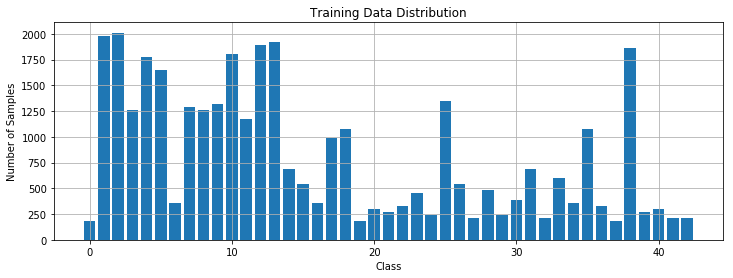

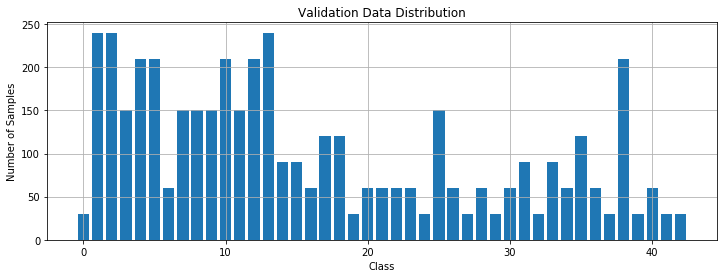

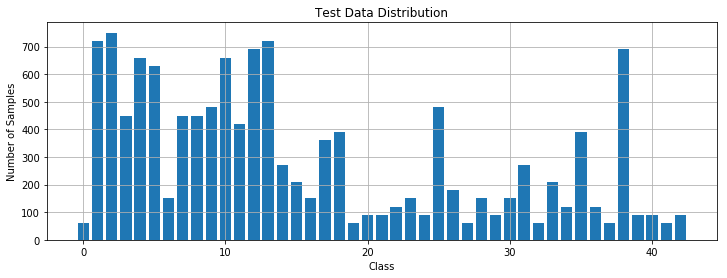

In [28]:
from plot_utils import plot_histogram
%matplotlib inline
    
#plot_histogram1(y_train, n_classes)
train_samples=[]
valid_samples=[]
test_samples=[]

for i in range(0, n_train_classes):
    train_samples.append(len(x_train[y_train == i]))
    valid_samples.append(len(x_valid[y_valid == i]))
    test_samples.append(len(x_test[y_test == i]))    

plot_histogram(range(0, n_train_classes), train_samples, title="Training Data Distribution", save_path='images/')
plot_histogram(range(0, n_valid_classes), valid_samples, title="Validation Data Distribution", save_path='images/')
plot_histogram(range(0, n_test_classes), test_samples, title="Test Data Distribution", save_path='images/')


### 1C: Random Color Image Samples by Sign Class

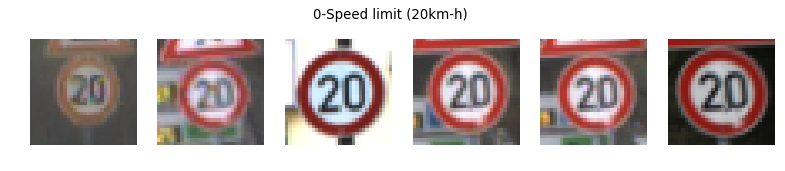

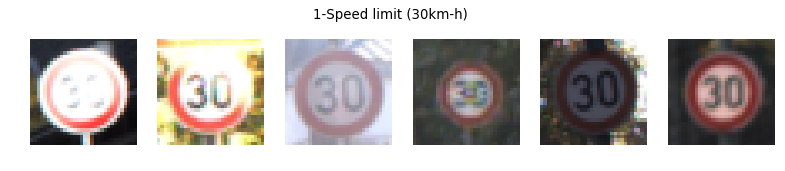

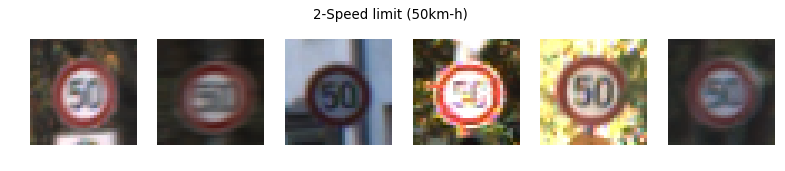

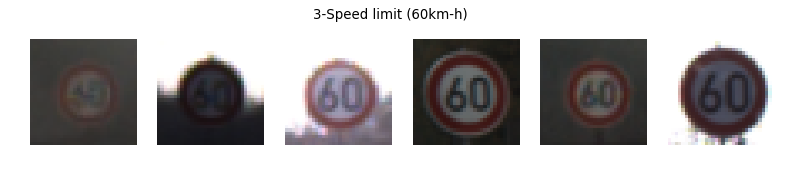

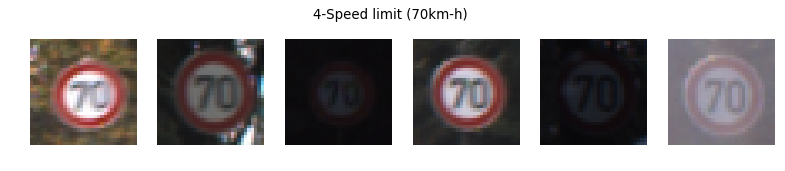

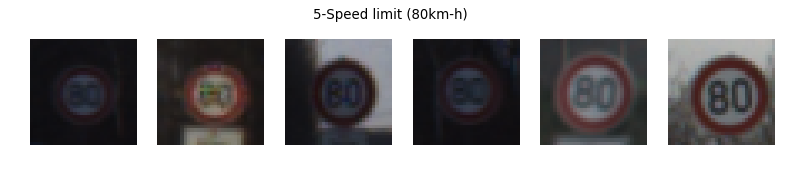

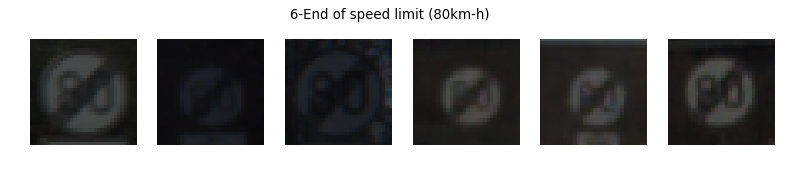

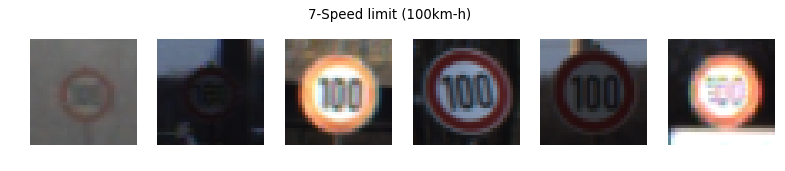

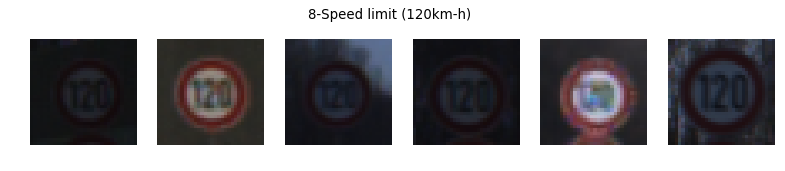

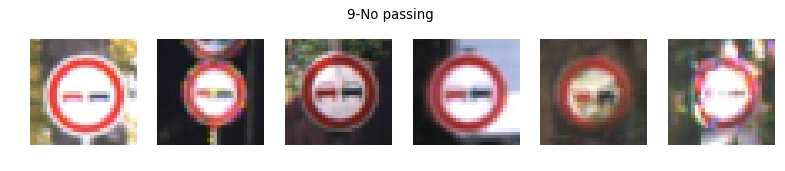

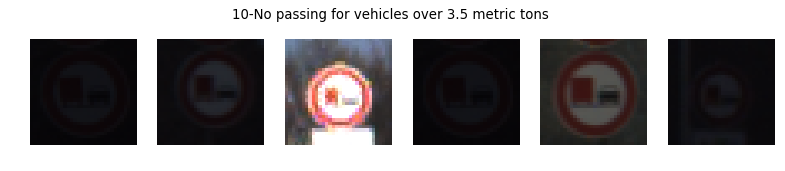

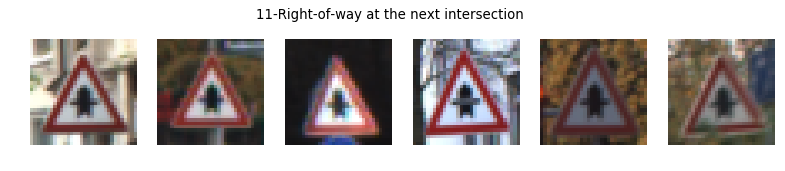

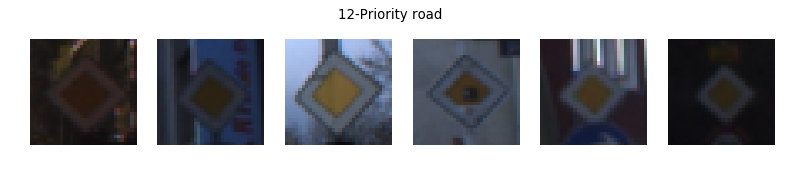

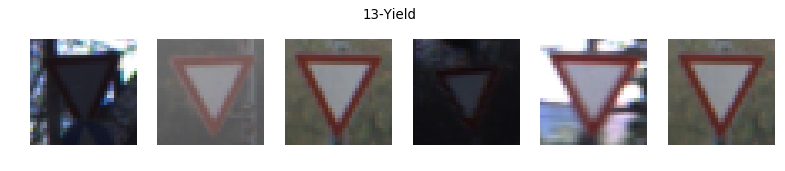

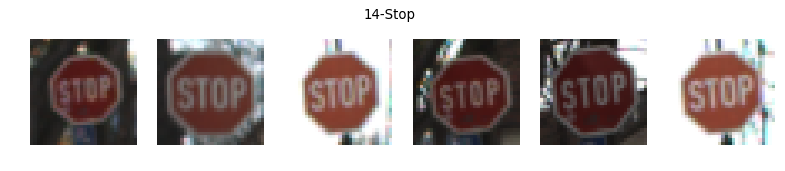

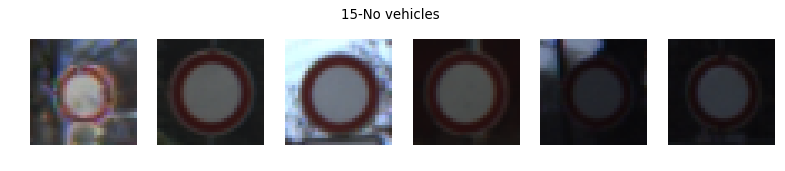

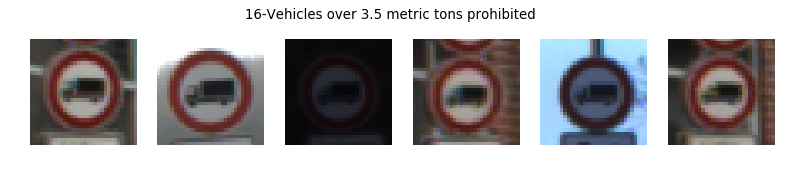

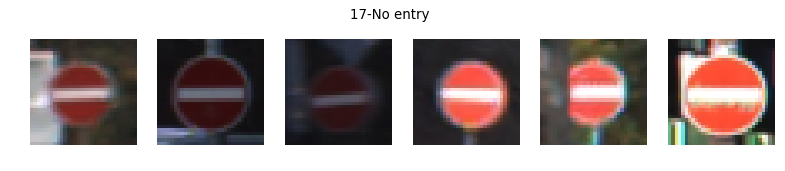

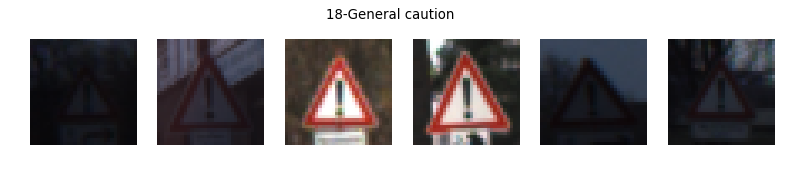

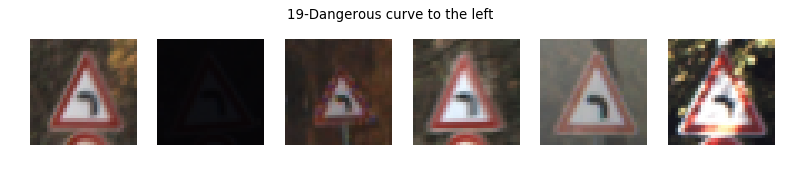

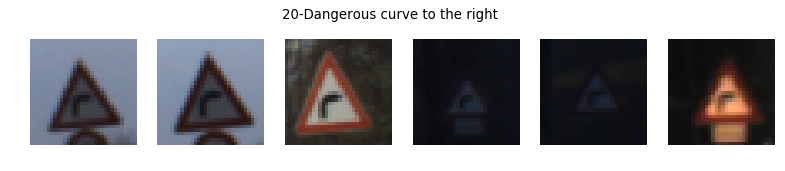

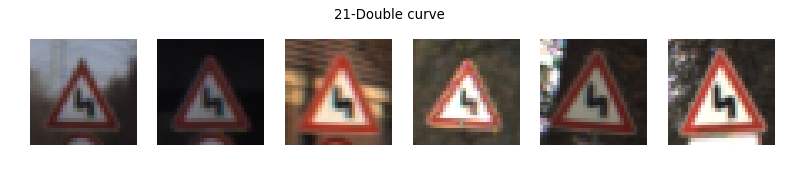

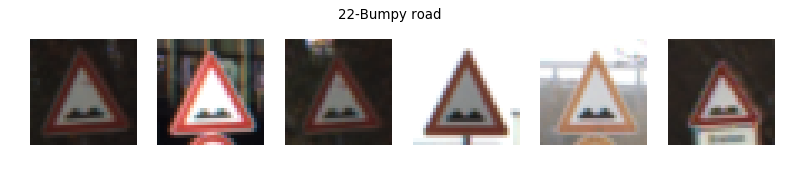

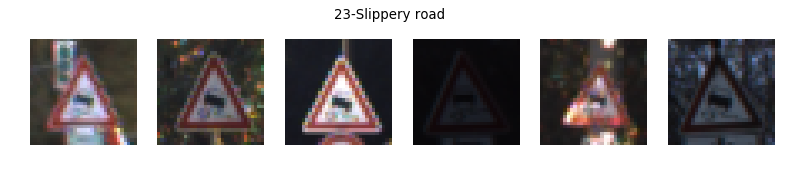

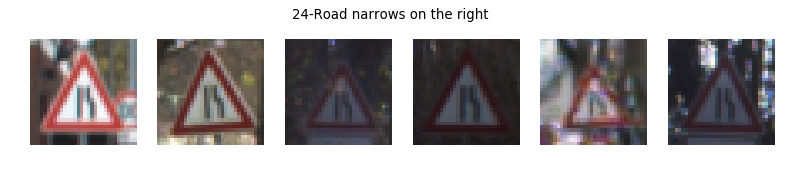

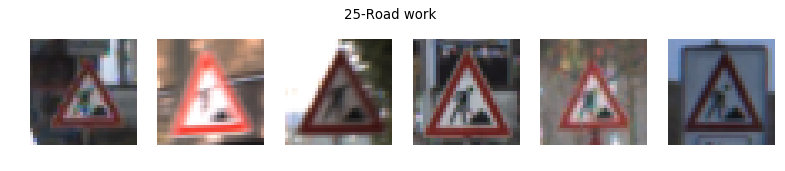

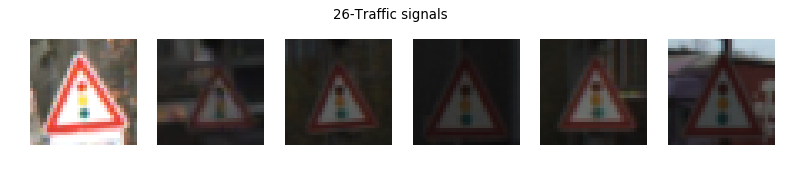

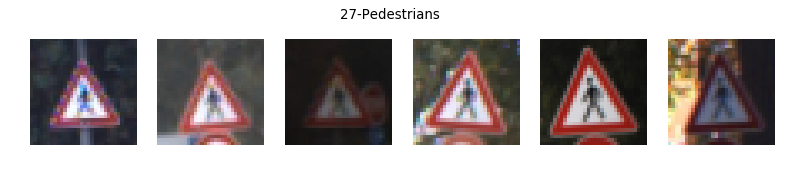

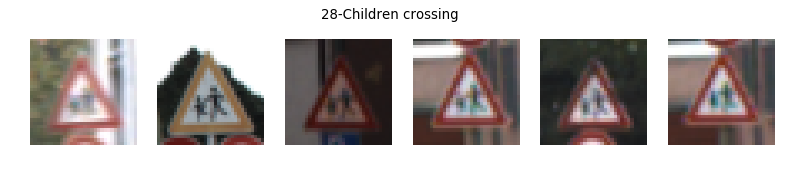

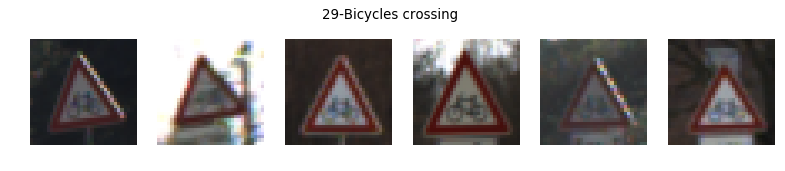

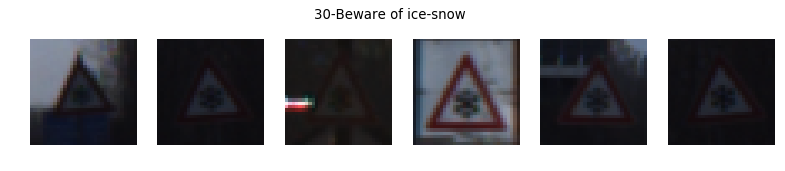

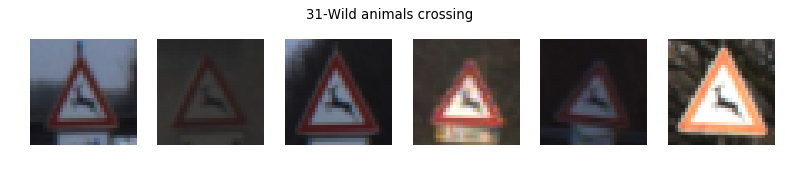

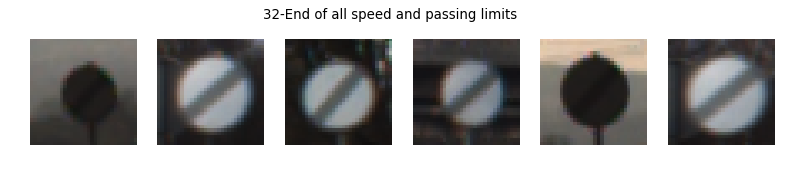

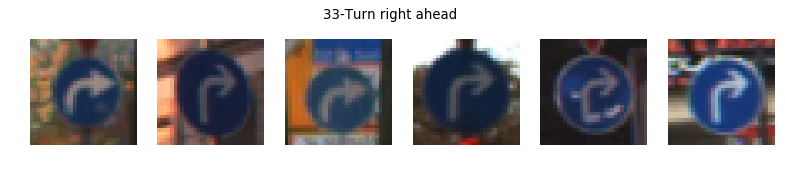

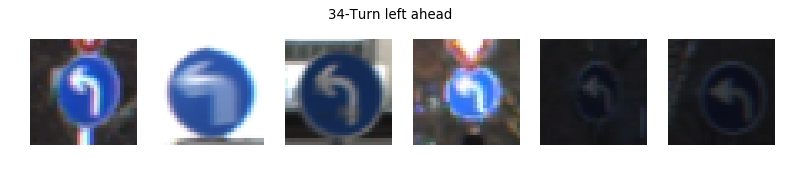

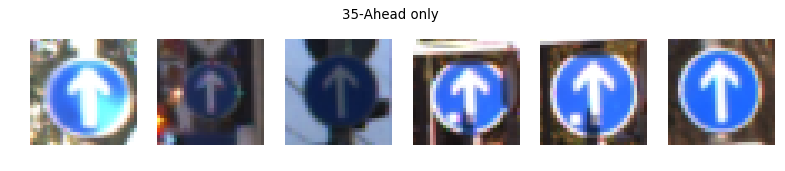

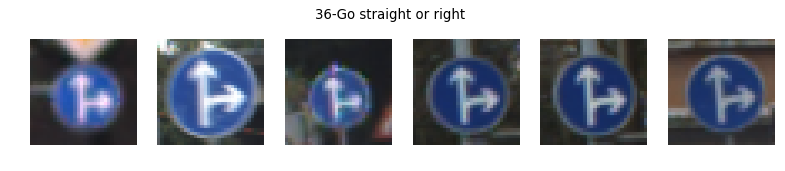

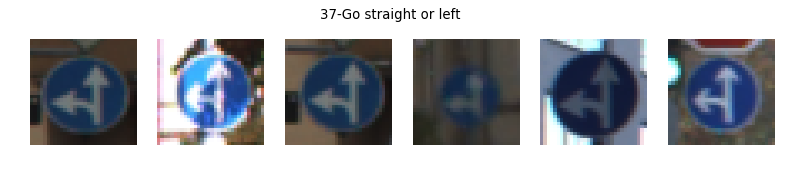

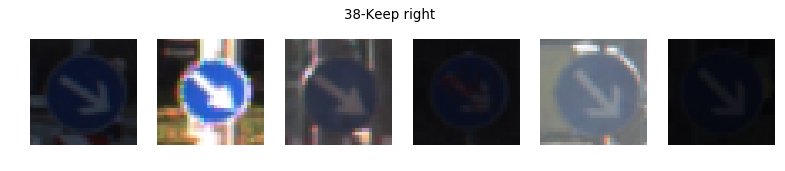

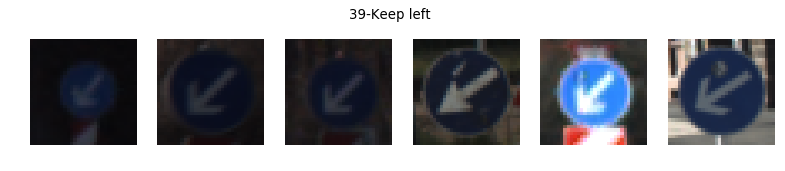

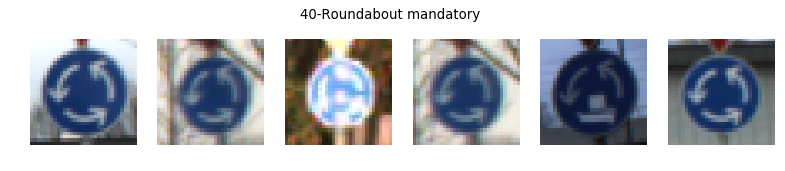

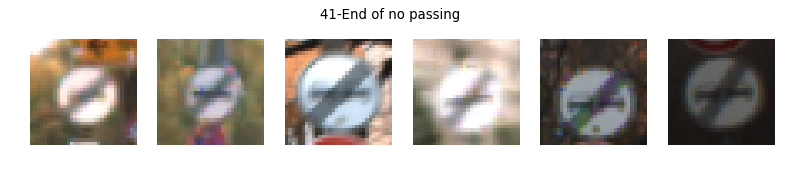

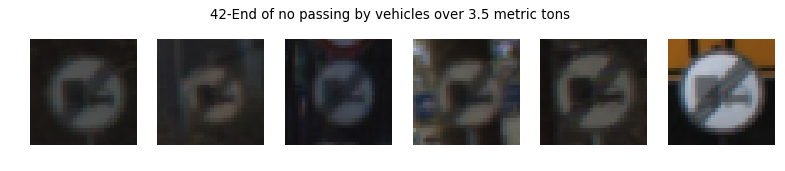

In [29]:
import random
from plot_utils import plot_images2
import plot_utils
import imp
imp.reload(plot_utils)

'Get 6 random image samples for each sign class'
sample_images=[]
sample_labels=[]
n=6

for index in range(0, n_train_classes):
    samples = np.where(y_train == index)
    for i in range(0, n):
        j=random.randint(0, len(samples[0])-1)
        sample_index = samples[0][j]
        
        image = x_train[sample_index]
        #image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        sample_images.append(image)
        sample_labels.append(y_train[sample_index])

'Plot each of the 6 ramdom image samples by sign class'
cols=6
for i in range(0, n_train_classes):
    title = str(class_labels[i][0]) + "-" +str(class_labels[i][1])
    plot_images2(i, sample_images[n*i:n*i+n], sample_labels[n*i:n*i+n], cols, title=title.replace('/','-'), save_path='images/')
    

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### 2A: Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [30]:
import cv2
imp.reload(plot_utils)
from plot_utils import plot_images3

'normalize image mean to 0'
def Normalize(images):
    result = (images - 128) / 128
    return result

'convert to grayscale'
def Grayscale(images):
    result = np.dot(images[...,:3], [0.2989, 0.5870, 0.1140])
    #grayscale=[]
    #for image in images:
    #    grayscale.append(cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY))
    #result = np.array(grayscale)
    #result = np.expand_dims(result, axis=3)
    return result

'resize image'
def Resize(images,x=32,y=32):
    resize=[]
    for image in images:
        resize.append(cv2.resize(image.astype('float32'),(x,y)))
    result = np.array(resize)
    return result

'crop image'
def Crop(images,x=3):
    result = images[:, x:-x, x:-x, :]
    return result

'gamma correction'
def GammaCorrection(images, gamma=0.4):
    correction=[]
    for image in images:
        correction.append(pow(image/255, gamma)*255)
    result = np.array(correction).astype('int')
    return result

'rotate image'
def Rotate(image, angle=10):
    img_center = tuple(np.array(image.shape[1::-1]) / 2)
    random_angle = random.randint(-angle, angle)
    #rotation_matrix = cv2.getRotationMatrix2D(img_center, random_angle, 1.0)
    #rotate = cv2.warpAffine(image, rotation_matrix, image.shape[1::-1], flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REPLICATE)
    rotate = image
    result = np.array(rotate)
    return result

'translate image'
def Translate(image, px=3, py=3):
    translation_matrix = np.float32([ [1,0, random.randint(-px, px)], [0,1, random.randint(-py, py)] ])
    translate = cv2.warpAffine(image, translation_matrix, (image.shape[0], image.shape[1]), borderMode=cv2.BORDER_REPLICATE)
    result = np.array(translate)
    return result

def Check_Dimensions(x, n):
    if x.ndim == n:
        x = np.expand_dims(x, axis=n)
    return x
        
'Function to Pre-Process Data'
def Pre_Process_Data(images, steps=0):
    result = images
    if (steps==0):
        result = Grayscale(images)
    elif (steps==1):
        result = Normalize(Grayscale(images))
    elif (steps==2):
        result = Normalize(Grayscale(Resize(Crop(images))))
    elif (steps==3):
        result = Normalize(Grayscale(Resize(Crop(GammaCorrection(images)))))
        
    # if result.ndim==3:
    #     result = np.expand_dims(result, axis=3)
            
    return result

### 2C: Pre-Process all training, validation, and test images

In [31]:
'Pre-Process all training, validation, and test images'
x_train_prep = Pre_Process_Data(x_train, steps=0)
x_valid_prep = Pre_Process_Data(x_valid, steps=0)
x_test_prep = Pre_Process_Data(x_test, steps=0)

'Print shapes'
print ("Training Shapes", "x:", x_train_prep.shape)
print ("Validation Shapes", "x:", x_valid_prep.shape)
print ("Test Data Shapes", "x:", x_test_prep.shape)


Training Shapes x: (34799, 32, 32)
Validation Shapes x: (4410, 32, 32)
Test Data Shapes x: (12630, 32, 32)


### 2D: Pre-Process on a random image from each sign class

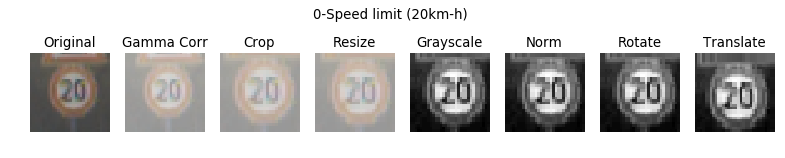

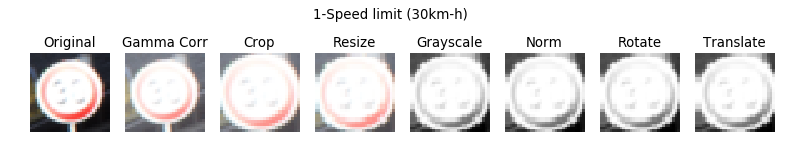

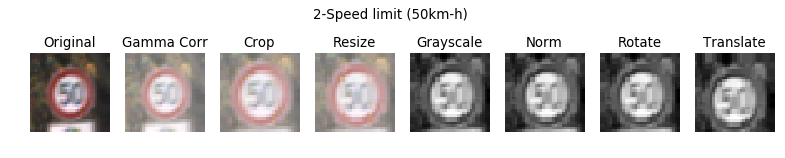

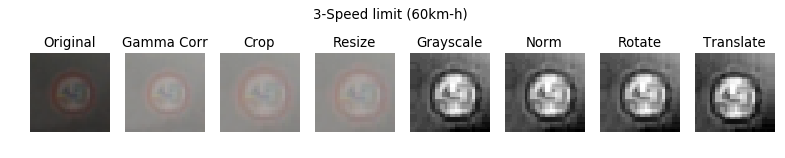

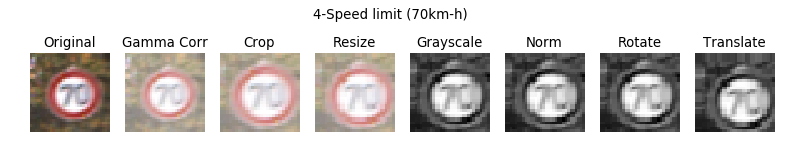

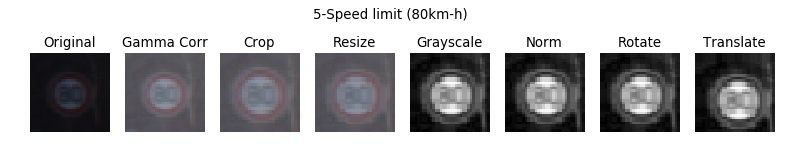

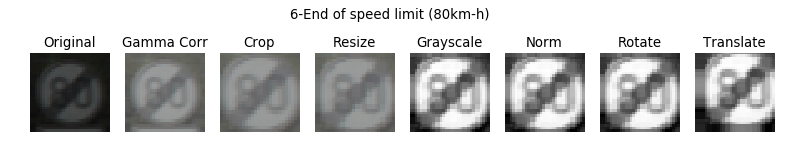

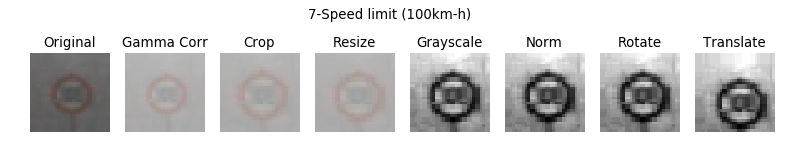

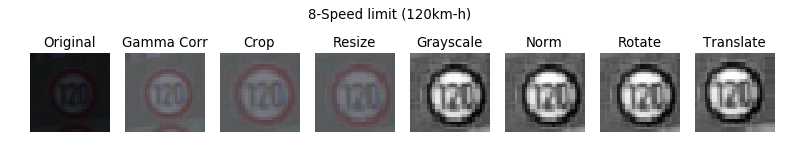

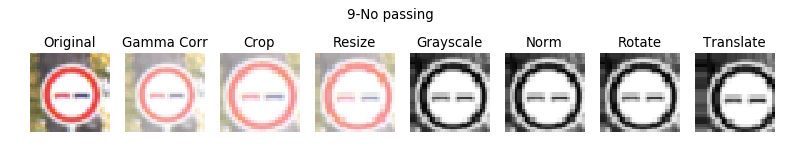

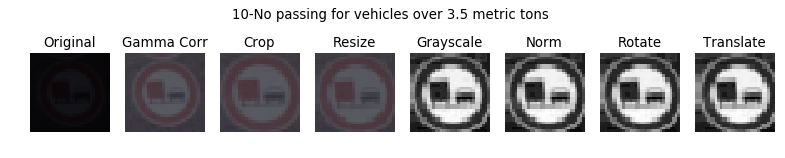

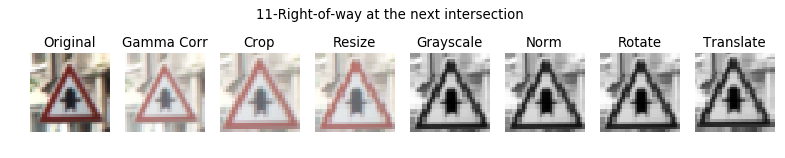

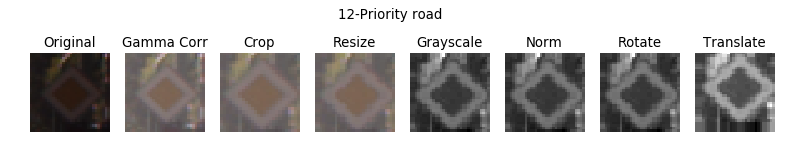

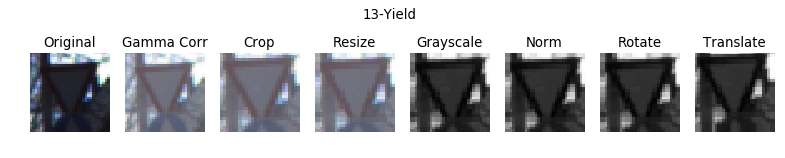

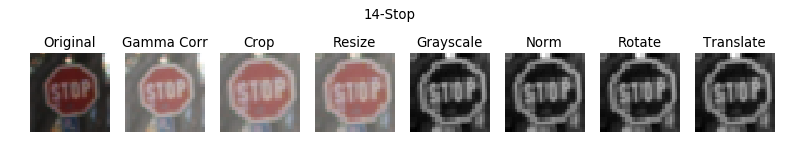

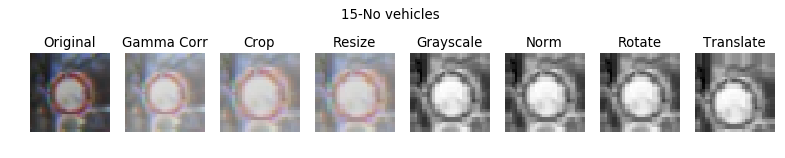

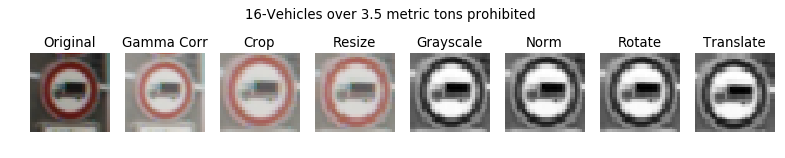

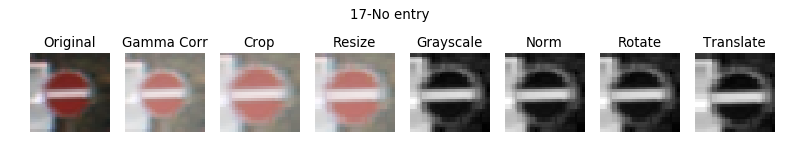

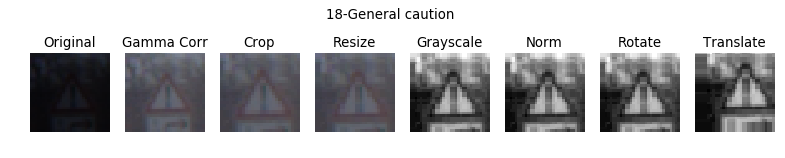

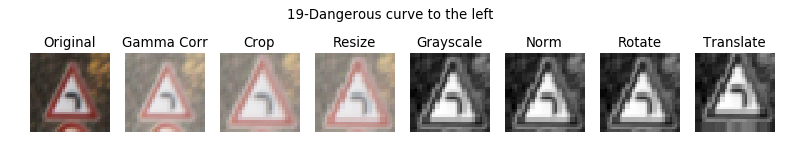

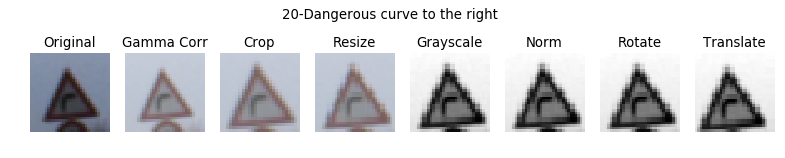

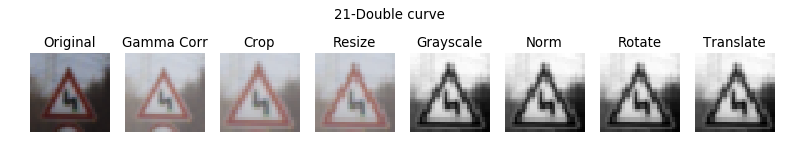

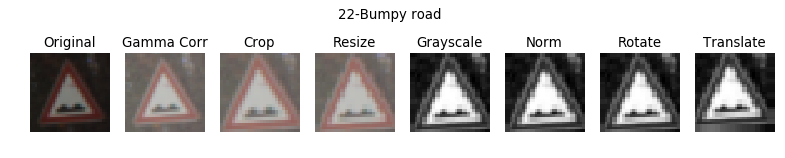

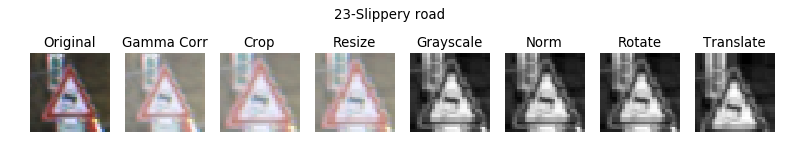

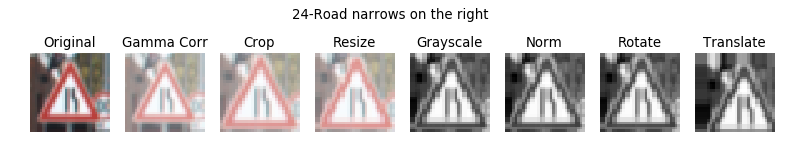

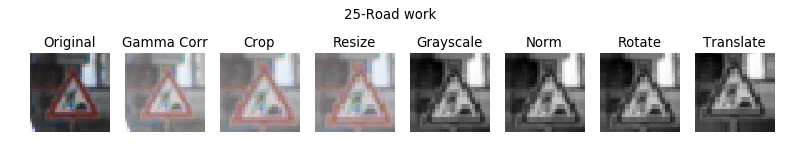

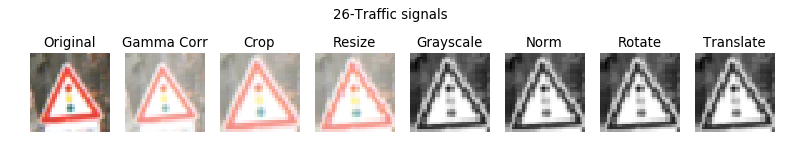

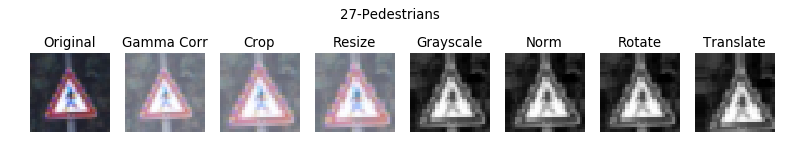

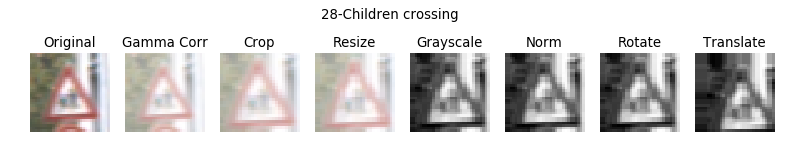

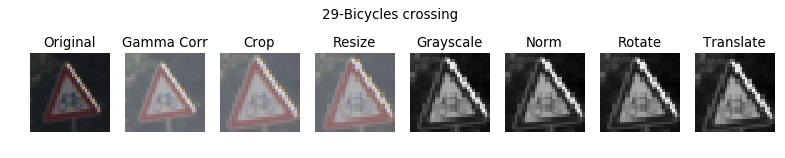

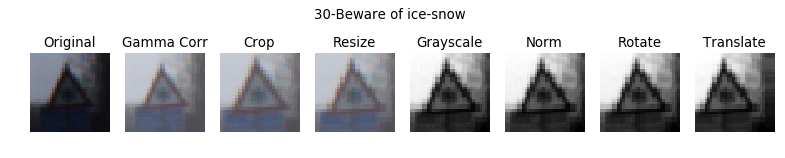

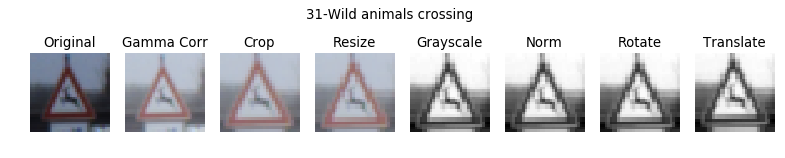

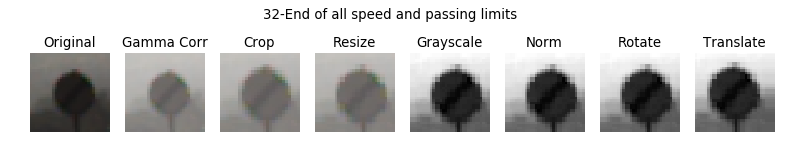

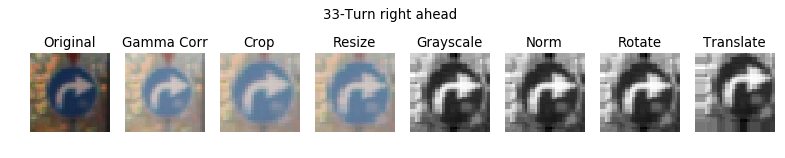

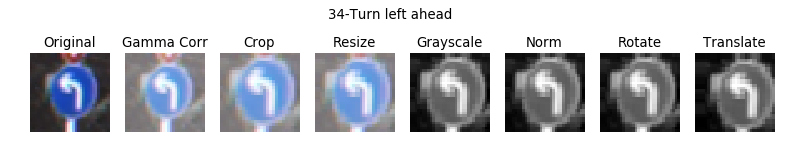

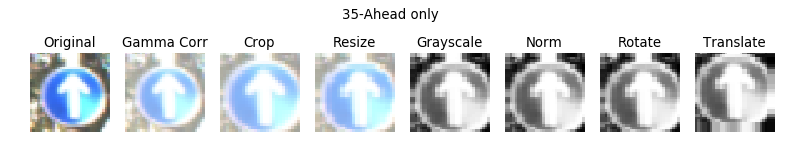

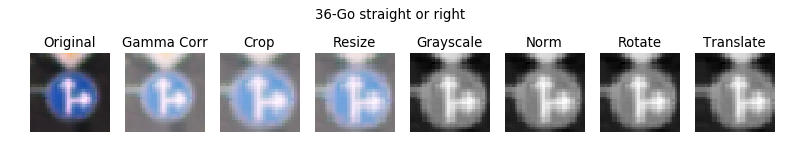

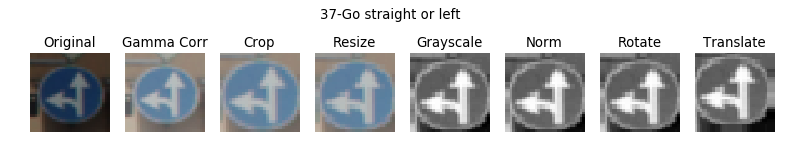

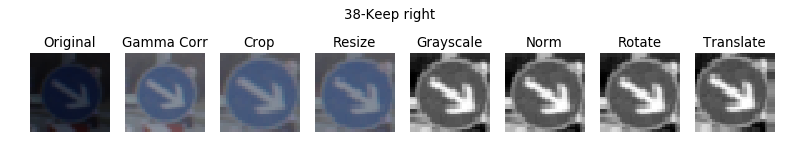

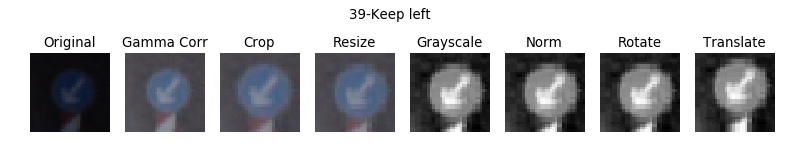

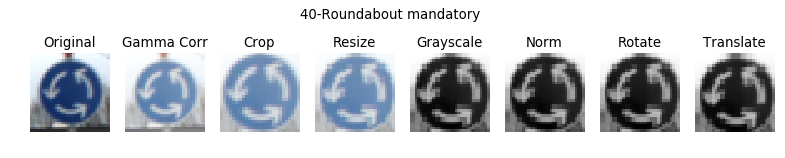

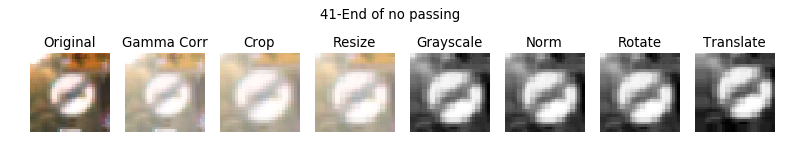

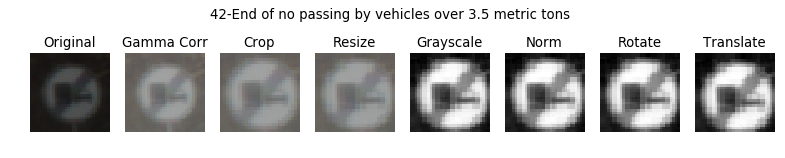

In [32]:
'Pre-Process on a random image from each sign class'
n=6
for i in range(0, n_train_classes):
    images = sample_images[n*i:n*i+n]
    processed_images=[]
    for j, image in enumerate(images):
        if j>0:
            continue
        gamma = GammaCorrection(image, 0.4)
        crop = gamma[3:-3, 3:-3, :]
        resize = cv2.resize(crop.astype('float32'),(32,32,),interpolation=cv2.INTER_NEAREST)
        gray =  cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
        norm =  Normalize(gray)
        rotate = Rotate(norm, angle=10)
        translate = Translate(rotate)
       
        processed_images=[image.astype('int'), 
                          gamma.astype('int'), 
                          crop.astype('int'), 
                          resize.astype('int'), 
                          gray.astype('int'), 
                          norm, 
                          rotate, 
                          translate]
                          
    sub_labels = ['Original','Gamma Corr','Crop','Resize','Grayscale','Norm', 'Rotate','Translate']
    title=str(class_labels[i][0]) + "-" +str(class_labels[i][1])

    'Plot processed images for each step in pipeline'
    cols=8
    plot_images3(i, processed_images, sample_labels[n*i:n*i+n], sub_labels, cols, title=title.replace('/','-'), save_path='images/')


### 2E: Augment Data

In [33]:
'Augment Data by Class'
def Augment_Data_By_Class(x, y, n=0):
    x_class, y_class = [], []
    new_x, new_y = [], []
    
    n_classes = len(np.unique(y))-1
    for classid in np.unique(y):                                       # loop through each class
        print('Augmenting Class ID '+str(classid)+' of '+str(n_classes), end='\r')

        # get x, y data for class
        x_class = x[y==classid]
        y_class = y[y==classid]

        for i, (image, index) in enumerate(zip(x_class, y_class)):     # loop through each image in class
                
            multiple = int(n/len(x_class))                             # generate a mutiple number of new images
            for j in range(0, multiple):

                rotated = Rotate(image)
                translated = Translate(rotated)                        # rotate and translate original image

                new_x.append(translated)
                new_y.append(index)
    print ('')
    if len(new_x)>0:
        x = np.append(x, new_x, axis=0)
    if len(new_y)>0:
        y = np.append(y, new_y, axis=0)
    
    return x, y

### 2F: Test Augmenting Data

In [34]:
'Print shapes'
print ("Training Shapes", "x:", x_train_prep.shape, "y:", y_train.shape)
print ("Validation Shapes", "x:", x_valid_prep.shape, "y:", y_valid.shape)

x_train_aug, y_train_aug = Augment_Data_By_Class(x_train_prep, y_train, n=5000)
x_valid_aug, y_valid_aug = Augment_Data_By_Class(x_valid_prep, y_valid, n=1000)

'Print shapes'
print ("Training Shapes", "x:", x_train_aug.shape)
print ("Validation Shapes", "x:", x_valid_aug.shape)


Training Shapes x: (34799, 32, 32) y: (34799,)
Validation Shapes x: (4410, 32, 32) y: (4410,)
Augmenting Class ID 42 of 42
Augmenting Class ID 42 of 42
Training Shapes x: (229281, 32, 32)
Validation Shapes x: (45150, 32, 32)


### 2G: Plot Histogram of Augmented Training Data

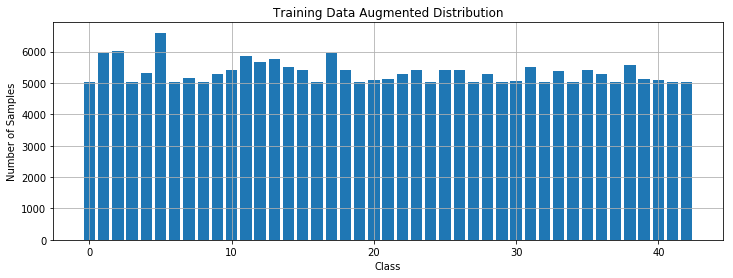

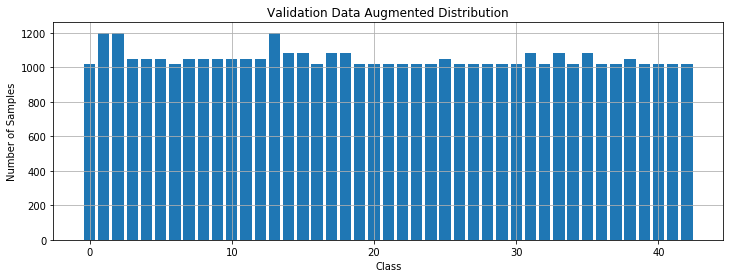

In [35]:
# Plot Histogram of Augmented Training Data
samples=[]
for i in range(0, len(np.unique(y_train))):
    samples.append(len(x_train_aug[y_train_aug == i]))
title="Training Data Augmented Distribution"
plot_histogram(range(0, n_train_classes), samples, title=title.replace('/','-'), save_path='images/')

# Plot Histogram of Augmented Training Data
samples=[]
for i in range(0, len(np.unique(y_valid))):
    samples.append(len(x_valid_aug[y_valid_aug == i]))
title="Validation Data Augmented Distribution"
plot_histogram(range(0, n_train_classes), samples,  title=title.replace('/','-'), save_path='images/')

### 2H: Test Pre-Processing and Augmentation Pipeline

In [36]:
'Pre-Process all training, validation, and test images'
x_train_prep = Pre_Process_Data(x_train, steps=0)
x_valid_prep = Pre_Process_Data(x_valid, steps=0)
x_test_prep = Pre_Process_Data(x_test, steps=0)

'Augment training and validation data images'
x_train_aug, y_train_aug = Augment_Data_By_Class(x_train_prep, y_train, n=5000)
x_valid_aug, y_valid_aug = Augment_Data_By_Class(x_valid_prep, y_valid, n=1000)

x_train_data, y_train_data = x_train_aug, y_train_aug
x_valid_data, y_valid_data = x_valid_aug, y_valid_aug
x_test_data, y_test_data = x_test_prep, y_test

x_train_data=Check_Dimensions(x_train_data, 3)
x_valid_data=Check_Dimensions(x_valid_data, 3)
x_test_data=Check_Dimensions(x_test_data, 3)

'Print shapes'
print ("Training Shapes", "x:", x_train_data.shape, "y:", y_train_data.shape)
print ("Validation Shapes", "x:", x_valid_data.shape, "y:", y_valid_data.shape)
print ("Test Data Shapes", "x:", x_test_data.shape, "y:", y_test_data.shape)

Augmenting Class ID 42 of 42
Augmenting Class ID 42 of 42
Training Shapes x: (229281, 32, 32, 1) y: (229281,)
Validation Shapes x: (45150, 32, 32, 1) y: (45150,)
Test Data Shapes x: (12630, 32, 32, 1) y: (12630,)


### Model Architecture

# 1. Define the Network

In [37]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

'Network architecture - based off LeNet'
def Network(x, filter_size=5, depth1=128, depth2=32, n_channels=1, p_dropout=1.0, mu=0, sigma=0.1, n_output_classes=43):
    
    # Weights
    W1 = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, n_channels, depth1), mean = mu, stddev = sigma))
    W2 = tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, depth1, depth2), mean = mu, stddev = sigma))
  # W3 Not Used
    W4 = tf.Variable(tf.truncated_normal(shape=(filter_size*filter_size*depth2, 120), mean = mu, stddev = sigma))
    W5 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    W6 = tf.Variable(tf.truncated_normal(shape=(84, n_output_classes), mean = mu, stddev = sigma))
    
    #Biases
    b1 = tf.Variable(tf.zeros(depth1))
    b2 = tf.Variable(tf.zeros(depth2))
  # b3 Not Used
    b4 = tf.Variable(tf.zeros(120))
    b5 = tf.Variable(tf.zeros(84))
    b6 = tf.Variable(tf.zeros(n_output_classes))
    
    #Layers
    layer1 = tf.nn.relu(tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID') + b1)
    layer1 = tf.nn.max_pool(layer1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer2 = tf.nn.relu(tf.nn.conv2d(layer1, W2, strides=[1, 1, 1, 1], padding='VALID') + b2)
    layer2 = tf.nn.max_pool(layer2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer3 = flatten(layer2)
    layer4 = tf.nn.relu(tf.matmul(layer3, W4) + b4)
    layer4 = tf.nn.dropout(layer4, p_dropout)
    layer5 = tf.nn.relu(tf.matmul(layer4, W5) + b5)
    layer5 = tf.nn.dropout(layer5, p_dropout)
    logits = tf.matmul(layer5, W6) + b6
    return logits

'Evaluate Trained Model'
def Evaluate(x_data, y_data):
    sess = tf.get_default_session()
    
    total_accuracy = 0
    for offset in range(0, len(x_data), BATCH_SIZE):
        batch_x, batch_y = x_data[offset:offset + BATCH_SIZE], y_data[offset:offset + BATCH_SIZE]
        accuracy = sess.run(accuracy_op, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    accuracy = total_accuracy / len(x_data)
    return accuracy
    

In [38]:
'Set up up some global variables in notebook'
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
logits = Network(x)
one_hot_y = tf.one_hot(y, n_train_classes)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
BATCH_SIZE = 128

'Set Up Training Algorithm'
def train(train_data, valid_data, test_data, depth1, depth2, p_dropout, rate, batch_size, EPOCHS):
    global logits, x, y, correct_prediction, accuracy_op, BATCH_SIZE
    
    #Set Up Data
    x_train_data, y_train_data = train_data[0],  train_data[1]
    x_valid_data, y_valid_data = valid_data[0], valid_data[1]
    x_test_data, y_test_data = test_data[0], test_data[1]
    
    BATCH_SIZE = batch_size
    n_channels = x_train_data.shape[3]

    x = tf.placeholder(tf.float32, (None, 32, 32, n_channels))
    y = tf.placeholder(tf.int32, (None))
            
    one_hot_y = tf.one_hot(y, n_train_classes)

    logits = Network(x, filter_size=5, depth1=depth1, depth2=depth2, n_channels=n_channels, p_dropout=p_dropout, mu=0, sigma=0.1, n_output_classes=43)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    loss_op = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    training_op = optimizer.minimize(loss_op)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    # Initialiate training session
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        n_train_examples = len(x_train_data)
        n_valid_examples = len(x_valid_data)
    
        # Initialize output lists
        l_epochs=[]
        l_train_acc=[]
        l_valid_acc=[]
        l_test_acc=[]

        # Loop through epochs and train and validate
        for epoch in range(EPOCHS):
            x_train_data, y_train_data = shuffle(x_train_data, y_train_data)      # shuffle training data for each epoch

            # Train on a batch of examples
            for offset in range(0, n_train_examples, BATCH_SIZE):
                batch_x, batch_y = x_train_data[offset:offset + BATCH_SIZE], y_train_data[offset:offset + BATCH_SIZE]
                _, train_loss = sess.run([training_op, loss_op], feed_dict={x: batch_x, y: batch_y})

            # Evaluate Training and Validation Accuracy'
            train_acc = Evaluate(x_train_data, y_train_data)
            valid_acc = Evaluate(x_valid_data, y_valid_data)
            
            # Append training and validation reults to output lists
            l_epochs.append(epoch+1)
            l_train_acc.append(train_acc)
            l_valid_acc.append(valid_acc)
            
            print('...Training on Epoch {}'.format(epoch+1) + '/{}: '.format(EPOCHS) +
                  'Training Accuracy={:.3f}: '.format(train_acc) + 
                  'Validation Accuracy={:.3f}: '.format(valid_acc), end='\r')

        # Evaluate model on test data
        test_acc = Evaluate(x_test_data, y_test_data)
        # Append test results to output list
        l_test_acc.append(test_acc)
        
        print('\n.........Test Accuracy={:.3f}: '.format(test_acc))

        ##### START Evaluate model on each class #####
        
        # Initialize output lists
        l_class_id=[]
        l_class_name=[]
        l_class_acc=[]

        # Loop through each class
        for i in range(0, n_test_classes-1):
            test_acc = Evaluate(x_test_data[y_test_data==i], y_test_data[y_test_data==i])
            #print("......Class {:.0f}".format(i), "Test Accuracy: {:.3f}".format(test_acc),str(class_labels[i][0]) + "-" +str(class_labels[i][1]))
            l_class_id.append(i)
            l_class_name.append(class_labels[i][1])
            l_class_acc.append(test_acc)
            
        ##### END Evaluate model on each class #####
       
    return [l_epochs, l_train_acc, l_valid_acc, l_test_acc, l_class_id, l_class_name, l_class_acc]


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [39]:
'Hyperparameters' 
# PreProcessingSteps, Augment, Depth1, Depth2, p_Dropout, rate, batch_size, epochs)''
model_params = []
#model_params.append(( 1, 0, False,   6, 16, 1.0, 0.001, 128, 20))
#model_params.append(( 2, 1, False,   6, 16, 1.0, 0.001, 128, 20))
#model_params.append(( 3, 2, False,   6, 16, 1.0, 0.001, 128, 20))
#model_params.append(( 4, 3, False,   6, 16, 1.0, 0.001, 128, 20))
#model_params.append(( 5, 1, False,  32, 16, 1.0, 0.001, 128, 20))
#model_params.append(( 6, 2, False,  32, 16, 1.0, 0.001, 128, 20))
#model_params.append(( 7, 3, False,  32, 16, 1.0, 0.001, 128, 20))
#model_params.append(( 8, 1, False,  64, 32, 1.0, 0.001, 128, 20))
#model_params.append(( 9, 2, False,  64, 32, 1.0, 0.001, 128, 20))
#model_params.append((10, 3, False,  64, 32, 1.0, 0.001, 128, 20))
#model_params.append((11, 1, False, 128, 32, 1.0, 0.001, 128, 20))
#model_params.append((12, 2, False, 128, 32, 1.0, 0.001, 128, 20))
#model_params.append((13, 3, False, 128, 32, 1.0, 0.001, 128, 20))
#model_params.append((14, 0, True,    6, 16, 1.0, 0.001, 128, 20))
#model_params.append((15, 1, True,    6, 16, 1.0, 0.001, 128, 20))
#model_params.append((16, 2, True,    6, 16, 1.0, 0.001, 128, 20))
#model_params.append((17, 3, True,    6, 16, 1.0, 0.001, 128, 20))
#model_params.append((18, 1, True,   32, 16, 1.0, 0.001, 128, 20))
#model_params.append((19, 2, True,   32, 16, 1.0, 0.001, 128, 20))
#model_params.append((20, 3, True,   32, 16, 1.0, 0.001, 128, 20))
#model_params.append((21, 1, True,   64, 32, 1.0, 0.001, 128, 20))
#model_params.append((22, 2, True,   64, 32, 1.0, 0.001, 128, 20))
#model_params.append((23, 3, True,   64, 32, 1.0, 0.001, 128, 20))
#model_params.append((24, 1, True,  128, 32, 1.0, 0.001, 128, 20))
#model_params.append((25, 2, True,  128, 32, 1.0, 0.001, 128, 20))
#model_params.append((26, 3, True,  128, 32, 1.0, 0.001, 128, 20))

#model_params.append((27, 3, False,   6, 16, 1.0, 0.001, 128, 50))
#model_params.append((28, 3, False,  32, 16, 1.0, 0.001, 128, 50))
#model_params.append((29, 3, False,  64, 32, 1.0, 0.001, 128, 50))
#model_params.append((30, 3, False, 128, 32, 1.0, 0.001, 128, 50))
#model_params.append((31, 3, True,    6, 16, 1.0, 0.001, 128, 50))
#model_params.append((32, 3, True,   32, 16, 1.0, 0.001, 128, 50))
#model_params.append((33, 3, True,   64, 32, 1.0, 0.001, 128, 50))
#model_params.append((34, 3, True,  128, 32, 1.0, 0.001, 128, 50))

#model_params.append((35, 3, False,   6, 16, 0.9, 0.001, 128, 50))
#model_params.append((36, 3, False,  32, 16, 0.9, 0.001, 128, 50))
#model_params.append((37, 3, False,  64, 32, 0.9, 0.001, 128, 50))
#model_params.append((38, 3, False, 128, 32, 0.9, 0.001, 128, 50))
#model_params.append((39, 3, True,    6, 16, 0.9, 0.001, 128, 50))
#model_params.append((40, 3, True,   32, 16, 0.9, 0.001, 128, 50))
#model_params.append((41, 3, True,   64, 32, 0.9, 0.001, 128, 50))
#model_params.append((42, 3, True,  128, 32, 0.9, 0.001, 128, 50))
#model_params.append((99, 3, False,  128, 32, 0.5, 0.0005, 128, 500))


In [34]:
import pandas as pd
import time
from IPython.display import clear_output
imp.reload(plot_utils)
from plot_utils import plot_model_results
from plot_utils import plot_class_results

'Run Each model'
for params in model_params:
    start_time=time.time()

    i = params[0]
    steps = params[1]
    augment = params[2]
    depth1 = params[3]
    depth2 = params[4]
    p_dropout = params[5]
    rate = params[6]
    batch_size = params[7]
    EPOCHS = params[8]

    clear_output(wait=True)
    print ("Model Run "+str(i))
    print ("...Pre-Processing Data")
    
    'Pre-Process all training, validation, and test images'
    x_train_prep = Pre_Process_Data(x_train, steps=steps)
    x_valid_prep = Pre_Process_Data(x_valid, steps=steps)
    x_test_prep = Pre_Process_Data(x_test, steps=steps)

    print ("...Augmenting the Data")    
    'Augment training and validation data images'
    if augment:
        x_train_aug, y_train_aug = Augment_Data_By_Class(x_train_prep, y_train, n=5000)
        x_valid_aug, y_valid_aug = Augment_Data_By_Class(x_valid_prep, y_valid, n=1000)
    else:
        x_train_aug, y_train_aug = Augment_Data_By_Class(x_train_prep, y_train, n=0)
        x_valid_aug, y_valid_aug = Augment_Data_By_Class(x_valid_prep, y_valid, n=0)
        
    x_train_data, y_train_data = x_train_aug, y_train_aug
    x_valid_data, y_valid_data = x_valid_aug, y_valid_aug
    x_test_data, y_test_data = x_test_prep, y_test

    x_train_data=Check_Dimensions(x_train_data, 3)
    x_valid_data=Check_Dimensions(x_valid_data, 3)
    x_test_data=Check_Dimensions(x_test_data, 3)

    # Prep Data for training'
    train_data = [x_train_data, y_train_data]
    valid_data = [x_valid_data, y_valid_data]
    test_data = [x_test_data, y_test_data]

    # Train, Validate, and Test'
    results = train(train_data, valid_data, test_data, depth1, depth2, p_dropout, rate, batch_size, EPOCHS)

    #plot and save training, validation, and testing accuracy for each model run
    title='Training_Accuracy'+str(i)
    plot_model_results(i, results[0], results[1], results[2], results[3], y_min=0.7, y_max=1.0, title=title.replace('/','-'), save_path='images/', show=False)
    
    #plot and save testing accuracy by class for each model run
    title='Class Test Accuracy_'+str(i)
    plot_class_results(i, results[4][:], results[6][:], results[3][:], y_min=0.4, y_max=1.0, title=title.replace('/','-'), save_path='images/', show=False)
    

Model Run 99
...Pre-Processing Data
...Augmenting the Data
Augmenting Class ID 42 of 42
Augmenting Class ID 42 of 42
...Training on Epoch 500/500: Training Accuracy=0.997: Validation Accuracy=0.974: 
.........Test Accuracy=0.960: 


# Plot Training, Validation and Test Results


In [40]:
#model_params.append((30, 3, False, 128, 32, 1.0, 0.001, 128, 50))
steps = 3
augment = False
depth1 = 128
depth2 = 32
p_dropout = 1.0
rate = 0.001
BATCH_SIZE = 128
EPOCHS = 30
    
'Set Up Data'
print ("...Pre-Processing and Augmenting the Data")
    
'Pre-Process all training, validation, and test images'
x_train_prep = Pre_Process_Data(x_train, steps=steps)
x_valid_prep = Pre_Process_Data(x_valid, steps=steps)
x_test_prep = Pre_Process_Data(x_test, steps=steps)

'Augment training and validation data images'
if augment:
    x_train_aug, y_train_aug = Augment_Data_By_Class(x_train_prep, y_train, n=5000)
    x_valid_aug, y_valid_aug = Augment_Data_By_Class(x_valid_prep, y_valid, n=1000)
else:
    x_train_aug, y_train_aug = Augment_Data_By_Class(x_train_prep, y_train, n=0)
    x_valid_aug, y_valid_aug = Augment_Data_By_Class(x_valid_prep, y_valid, n=0)
        
x_train_data, y_train_data = x_train_aug, y_train_aug
x_valid_data, y_valid_data = x_valid_aug, y_valid_aug
x_test_data, y_test_data = x_test_prep, y_test

x_train_data=Check_Dimensions(x_train_data, 3)
x_valid_data=Check_Dimensions(x_valid_data, 3)
x_test_data=Check_Dimensions(x_test_data, 3)

n_channels = x_train_data.shape[3]

x = tf.placeholder(tf.float32, (None, 32, 32, n_channels))
y = tf.placeholder(tf.int32, (None))
            
one_hot_y = tf.one_hot(y, n_train_classes)

logits = Network(x, filter_size=5, depth1=depth1, depth2=depth2, n_channels=n_channels, p_dropout=p_dropout, mu=0, sigma=0.1, n_output_classes=43)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_op = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_op = optimizer.minimize(loss_op)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

# Initialiate training session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
        
    n_train_examples = len(x_train_data)
    n_valid_examples = len(x_valid_data)

    # Initialize output lists
    l_epochs=[]
    l_train_acc=[]
    l_valid_acc=[]
    l_test_acc=[]

    # Loop through epochs and train and validate
    for epoch in range(EPOCHS):
        x_train_data, y_train_data = shuffle(x_train_data, y_train_data)      # shuffle training data for each epoch

        # Train on a batch of examples
        for offset in range(0, n_train_examples, BATCH_SIZE):
            batch_x, batch_y = x_train_data[offset:offset + BATCH_SIZE], y_train_data[offset:offset + BATCH_SIZE]
            _, train_loss = sess.run([training_op, loss_op], feed_dict={x: batch_x, y: batch_y})

        # Evaluate Training and Validation Accuracy'
        train_acc = Evaluate(x_train_data, y_train_data)    # train model by epoch
        valid_acc = Evaluate(x_valid_data, y_valid_data)    # validate model on each epoch
            
        # Append training and validation reults to output lists
        l_epochs.append(epoch+1)
        l_train_acc.append(train_acc)
        l_valid_acc.append(valid_acc)
            
        print('...Training on Epoch {}'.format(epoch+1) + '/{}: '.format(EPOCHS) +
              'Training Accuracy={:.3f}: '.format(train_acc) + 
              'Validation Accuracy={:.3f}: '.format(valid_acc), end='\r')

        # Save model after each epoch
        saver.save(sess, './lenet')            

    print("...Model saved", end='\n\n')

    test_acc = Evaluate(x_test_data, y_test_data)      # Evaluate model on test data
    l_test_acc.append(test_acc)                        # Append test results to output list

    print('\n.........Test Accuracy={:.3f}: '.format(test_acc))

    ##### START Evaluate model on each class #####
        
    # Initialize output lists
    l_class_id=[]
    l_class_name=[]
    l_class_acc=[]

    # Loop through each class
    for i in range(0, n_test_classes-1):
        test_acc = Evaluate(x_test_data[y_test_data==i], y_test_data[y_test_data==i])
        #print("......Class {:.0f}".format(i), "Test Accuracy: {:.3f}".format(test_acc),str(class_labels[i][0]) + "-" +str(class_labels[i][1]))
        l_class_id.append(i)
        l_class_name.append(class_labels[i][1])
        l_class_acc.append(test_acc)
            
    ##### END Evaluate model on each class #####


...Pre-Processing and Augmenting the Data
Augmenting Class ID 42 of 42
Augmenting Class ID 42 of 42
...Model saved Epoch 30/30: Training Accuracy=1.000: Validation Accuracy=0.975: 


.........Test Accuracy=0.952: 


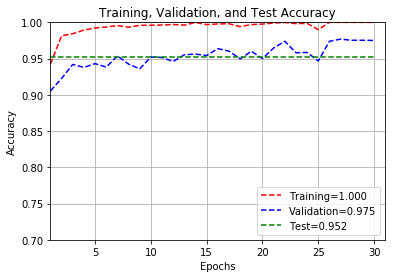

In [44]:
from plot_utils import plot_model_results
#plot and save training, validation, and testing accuracy for each model run
title='Training_Accuracy'+str(0)
plot_model_results(0, l_epochs, l_train_acc, l_valid_acc, l_test_acc, y_min=0.7, y_max=1.0, title=title.replace('/','-'), save_path='images/', show=True)



# Plot Class Results for Test Data

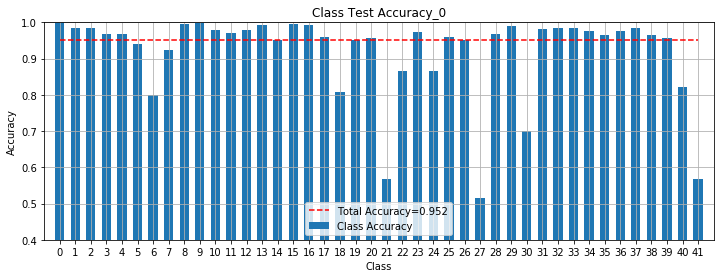

In [53]:
from plot_utils import plot_class_results
#plot and save testing accuracy by class for each model run
title='Class Test Accuracy_'+str(0)

plot_class_results(0, l_class_id[:], l_class_acc[:], l_test_acc[:], y_min=0.4, y_max=1.0, title=title.replace('/','-'), save_path='images/', show=True)


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

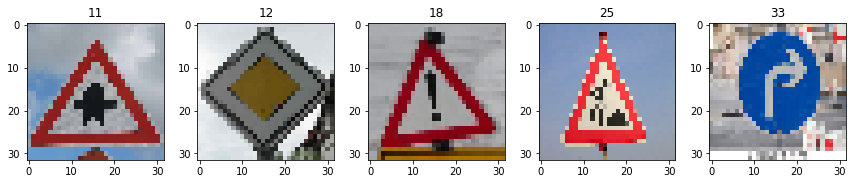

In [54]:
import os
import cv2
import matplotlib.image as mpimg # for loading in images
imp.reload(plot_utils)
from plot_utils import plot_images

images=os.listdir("my_signs/")
#print(images)

my_images = []
for image in images:
    filename = os.path.join("my_signs/", image)
    img = mpimg.imread(filename)
    img1 = cv2.resize(img, (32, 32))
    my_images.append(img1)
    
    #img2 = cv2.resize(img, (200, 200))
    #mpimg.imsave(filename+"_200x200", img2, format="png")

my_images = np.array(my_images)
my_labels = np.array([11,12,18,25,33])
plot_images(my_images, my_labels, cols=5)
    

### Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from .\lenet
[11 12 18 25 33]
[11 12 18 25 33]


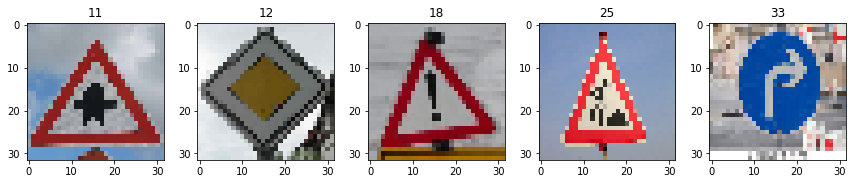

In [55]:
my_data = Pre_Process_Data(my_images, steps=steps)

if my_data.ndim==3:
    my_data = np.expand_dims(my_data, axis=3)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    prediction = sess.run(tf.argmax(logits, axis = 1), feed_dict={x: my_data, y: my_labels})

print(prediction)
print (my_labels)

plot_images(my_images, prediction, cols=5)


### Analyze Performance

In [56]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

correct = 0
for i, j in zip(prediction, my_labels):
    correct += (i==j)
test_accuracy = correct / len(prediction)    
print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [65]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    probabilities, predictions = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k = 5), feed_dict={x: my_data, y: my_labels})

for i, (prediction, probability, image) in enumerate(zip(predictions, probabilities, my_images)):
    print() 
    true_label = class_labels[i][1]
    print('True Label is: = {:<2}: {:<30}'.format(my_labels[i], true_label))
    print()

    for pred, p in zip(prediction, probability):
        sign_name = class_labels[pred][1]
        print('{:>3.3f}% {:>5}: {:<40}'.format(p*100.0, pred, sign_name))


INFO:tensorflow:Restoring parameters from .\lenet

True Label is: = 11: Speed limit (20km/h)          

100.000%    11: Right-of-way at the next intersection   
0.000%    30: Beware of ice/snow                      
0.000%    10: No passing for vehicles over 3.5 metric tons
0.000%    16: Vehicles over 3.5 metric tons prohibited
0.000%    21: Double curve                            

True Label is: = 12: Speed limit (30km/h)          

100.000%    12: Priority road                           
0.000%    15: No vehicles                             
0.000%     9: No passing                              
0.000%    40: Roundabout mandatory                    
0.000%     7: Speed limit (100km/h)                   

True Label is: = 18: Speed limit (50km/h)          

100.000%    18: General caution                         
0.000%    26: Traffic signals                         
0.000%    25: Road work                               
0.000%    27: Pedestrians                             
0.000%  

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [42]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
